# Duffing Oscillator: Simulation and Data Preparation

This notebook loads raw simulation data of the Duffing oscillator and:
- Visualizes time and phase trajectories
- Converts CSV data to `.npy` format for efficient neural network use
- Computes and plots the total mechanical energy (kinetic + potential)

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Directories
raw_dir = "../data/raw/"
processed_dir = "../data/processed/"
os.makedirs(processed_dir, exist_ok=True)

In [14]:
# List all simulation files
filenames = sorted([f for f in os.listdir(raw_dir) if f.endswith(".csv")])

print(f"Found {len(filenames)} simulation files.")

Found 475 simulation files.


## Visual Inspection of Dynamics

We visualize a few sample trajectories, both in time `x(t)` and in phase space `(x, v)`, to understand different regimes (e.g., periodic vs chaotic).

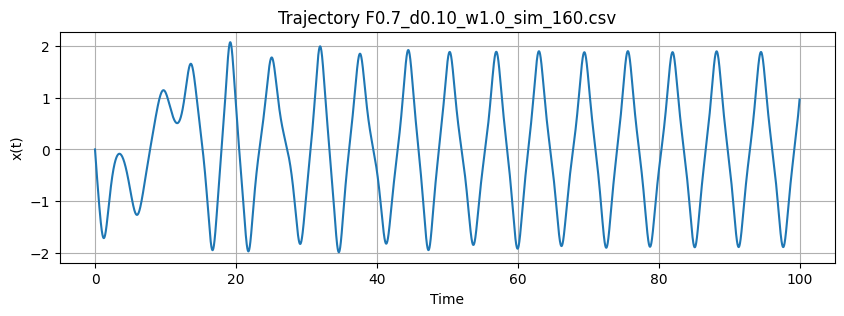

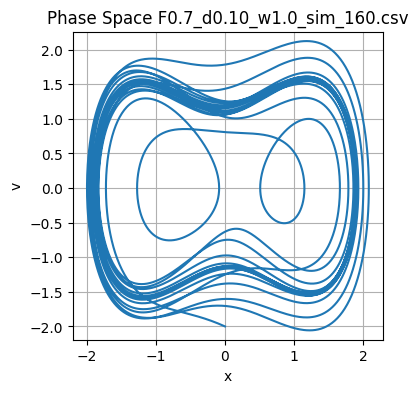

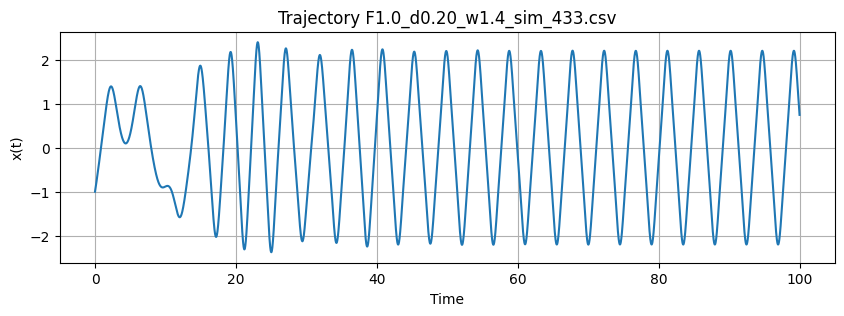

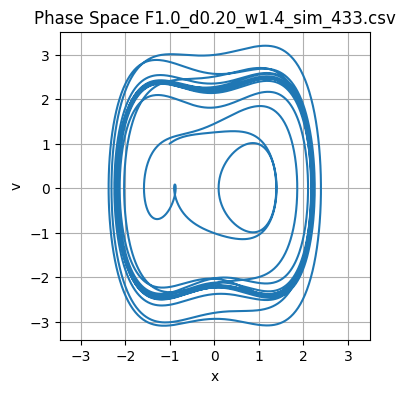

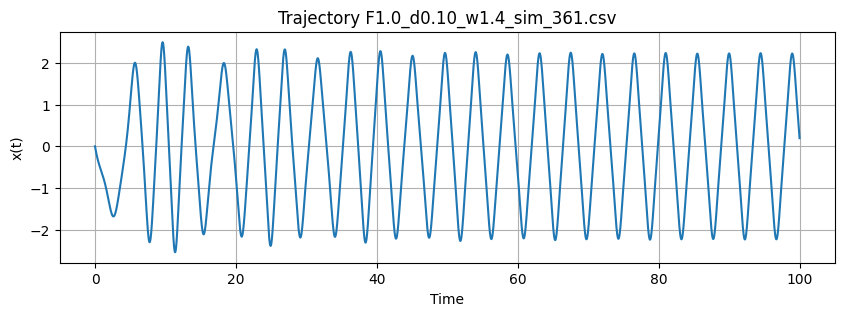

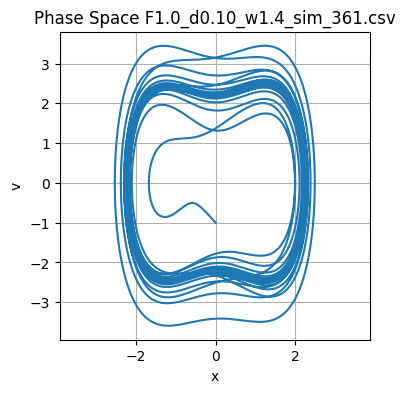

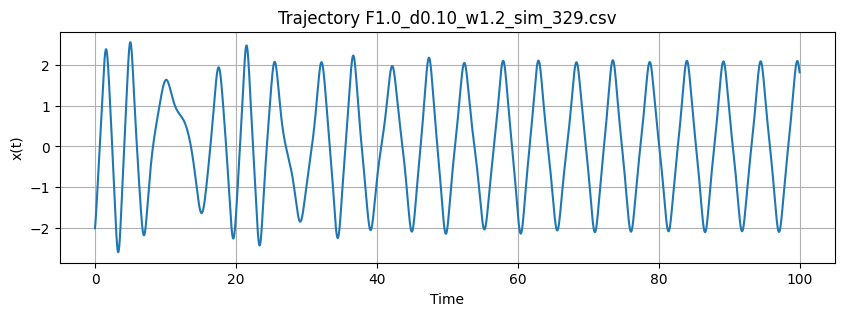

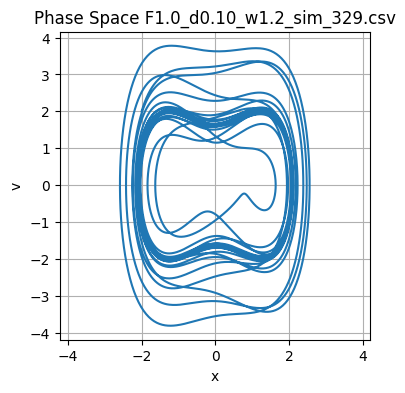

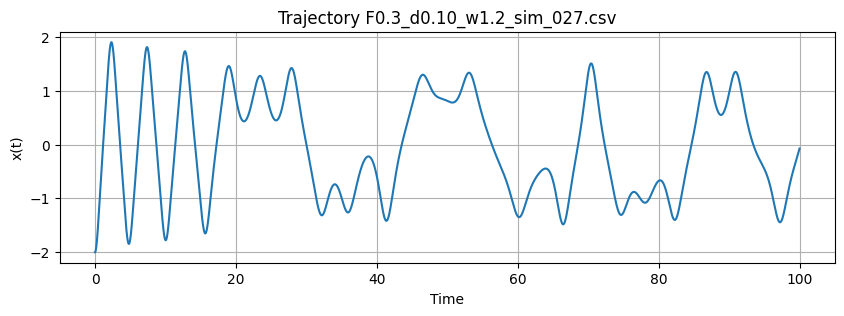

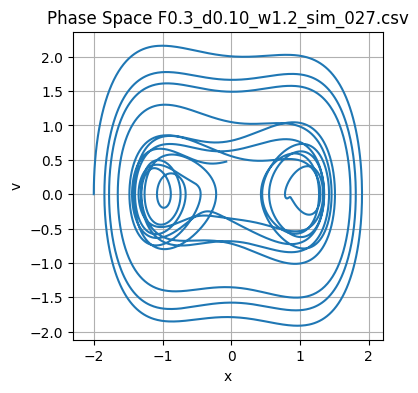

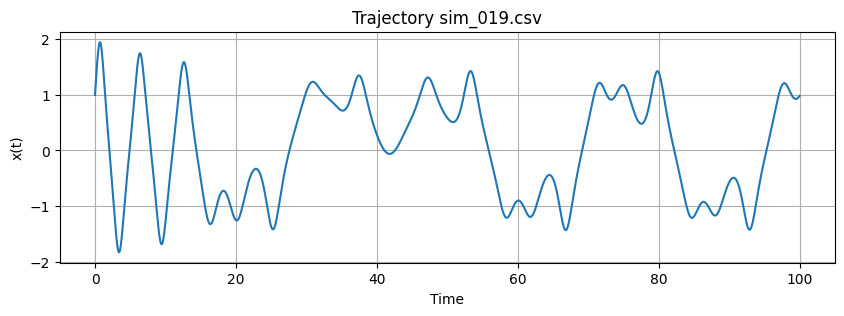

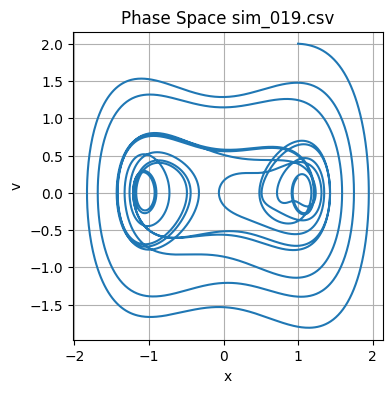

In [19]:
import random
sample_files = random.sample(filenames, 6)

# Plot a few sample simulations (random selection)
for file_name in sample_files:
    data = pd.read_csv(os.path.join(raw_dir, file_name))

    t = data["t"].values
    x = data["x"].values
    v = data["v"].values

    # Plot x(t)
    plt.figure(figsize=(10, 3))
    plt.plot(t, x, label="x(t)")
    plt.title(f"Trajectory {file_name}")
    plt.xlabel("Time")
    plt.ylabel("x(t)")
    plt.grid(True)
    plt.show()

    # Phase space plot
    plt.figure(figsize=(4, 4))
    plt.plot(x, v)
    plt.title(f"Phase Space {file_name}")
    plt.xlabel("x")
    plt.ylabel("v")
    plt.grid(True)
    plt.axis("equal")
    plt.show()

## Preprocessing for Neural Network

All simulation data is saved in `.csv` format with columns `[t, x, v]`. We convert each to a `.npy` file for efficient loading during model training.

In [16]:
# Convert all CSVs to .npy for fast loading in NN
for i, file_name in enumerate(filenames):
    data = pd.read_csv(os.path.join(raw_dir, file_name))
    arr = data[["x", "v"]].values  # You can include 't' if you want

    out_name = os.path.join(processed_dir, file_name.replace(".csv", ".npy"))
    np.save(out_name, arr)

## Energy Check

To better understand the system’s physical behavior, we compute and visualize the kinetic, potential, and total mechanical energy separately.

- **Kinetic Energy** reflects the motion of the oscillator and shows how energy is exchanged dynamically.
- **Potential Energy** comes from the double-well potential and highlights nonlinear restoring forces.
- **Total Mechanical Energy** reveals how energy decays over time due to damping.

Plotting each component in its own subplot makes it easier to observe fine-grained behaviors, oscillation amplitudes, and the long-term impact of damping. This also helps us verify that the simulation remains physically consistent and numerically stable.


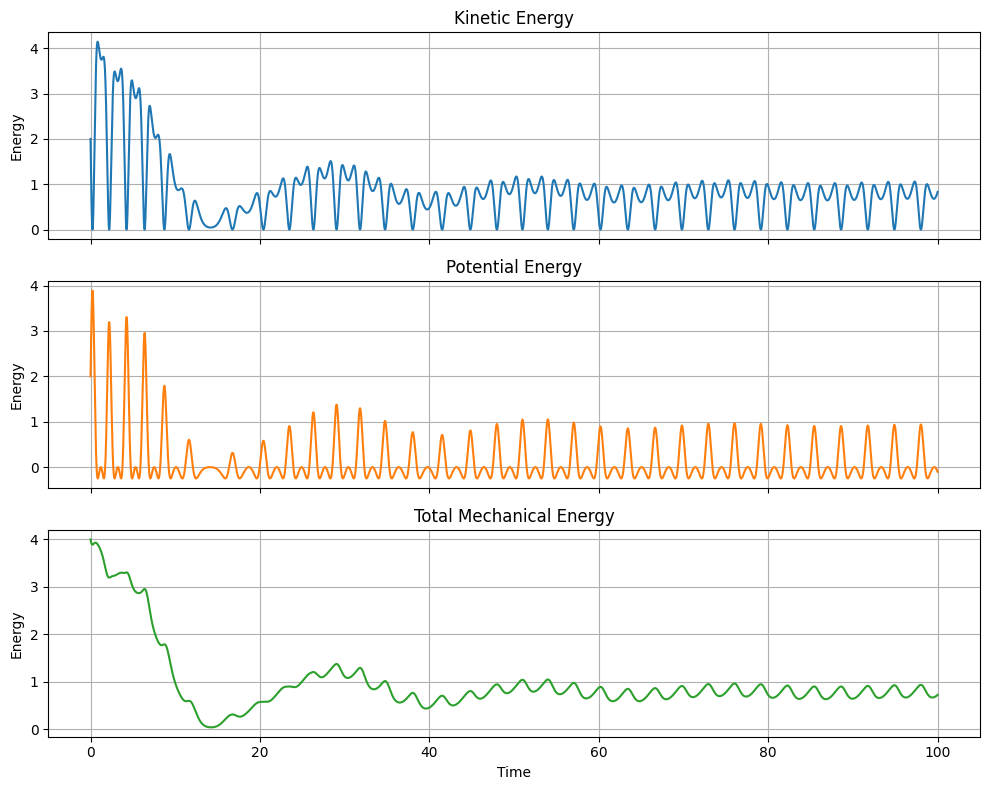

In [20]:
m = 1.0
k = -1.0
alpha = 1.0

sample_data = pd.read_csv(os.path.join(raw_dir, filenames[0]))
t = sample_data["t"].values
x = sample_data["x"].values
v = sample_data["v"].values

KE = 0.5 * m * v**2
PE = 0.5 * k * x**2 + 0.25 * alpha * x**4
E_total = KE + PE

# Plot KE, PE, and Total Energy in separate subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axs[0].plot(t, KE, label="Kinetic Energy", color="tab:blue")
axs[0].set_ylabel("Energy")
axs[0].set_title("Kinetic Energy")
axs[0].grid(True)

axs[1].plot(t, PE, label="Potential Energy", color="tab:orange")
axs[1].set_ylabel("Energy")
axs[1].set_title("Potential Energy")
axs[1].grid(True)

axs[2].plot(t, E_total, label="Total Energy", color="tab:green")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Energy")
axs[2].set_title("Total Mechanical Energy")
axs[2].grid(True)

plt.tight_layout()
plt.show()

## Summary

- We visualized key dynamics from the simulated Duffing system.
- We confirmed physical behavior by plotting energy components.
- Converted all files into `.npy` format for fast loading by the neural network models.

This completes the data generation and inspection step of our study.
